<a href="https://colab.research.google.com/github/Prava0712/Image-Classification-Using-CNNs/blob/main/Image_Classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Setup and Data Loading
CIFAR-10 dataset

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Flatten,
Dense, Dropout)
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
# Load the dataset
(x_train_orig, y_train_orig), (x_test_orig, y_test_orig) = cifar10.load_data()
# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog',
'frog', 'horse', 'ship', 'truck']
# Verify the shapes
print("Training data shape (original):", x_train_orig.shape)
print("Test data shape (original):", x_test_orig.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Training data shape (original): (50000, 32, 32, 3)
Test data shape (original): (10000, 32, 32, 3)


Data Exploration and Preparation
1. Display Sample Images and Labels

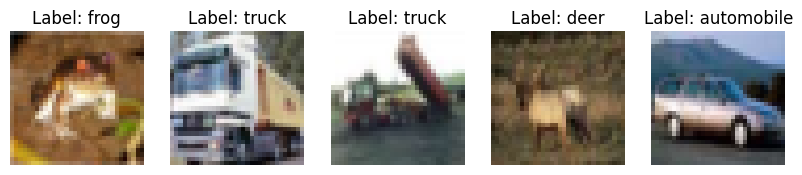

Sample images displayed successfully.


In [4]:
plt.figure(figsize=(10, 2))
for i in range(5):
 plt.subplot(1, 5, i + 1)
 plt.imshow(x_train_orig[i])
 plt.title(f"Label: {class_names[y_train_orig[i][0]]}")
 plt.axis('off')
plt.show()
print("Sample images displayed successfully.")


1. Dataset Shape and Unique Labels

In [5]:
# Print the shape of the dataset
print("\nDataset Shape:")
print("x_train shape:", x_train_orig.shape)
print("y_train shape:", y_train_orig.shape)
print("x_test shape:", x_test_orig.shape)
print("y_test shape:", y_test_orig.shape)
# Count of unique labels
unique_labels = np.unique(y_train_orig)
print("\nUnique labels:", unique_labels)
print("Count of unique labels (classes):", len(unique_labels))


Dataset Shape:
x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)

Unique labels: [0 1 2 3 4 5 6 7 8 9]
Count of unique labels (classes): 10


Normalize Image Pixel Values Pixel values are converted from the range [0,255] to the
range [0,1] by dividing by 255.0. This aids in faster convergence during training.

In [6]:
# Normalize image data
x_train = x_train_orig.astype('float32') / 255.0
x_test = x_test_orig.astype('float32') / 255.0
print("\nData normalized to [0, 1].")
# Convert labels to one-hot encoding (for categorical crossentropy loss)
y_train_cat = to_categorical(y_train_orig, num_classes=10)
y_test_cat = to_categorical(y_test_orig, num_classes=10)


Data normalized to [0, 1].


Split Dataset (80% Train, 20% Test/Validation) The original x_train_orig (50,000
samples) is split into a new training set (40,000 samples, 80%) and a validation set
(10,000 samples, 20%). The original x_test_orig (10,000 samples) will be used for final
model evaluation.

In [8]:
# Split x_train (50,000) into 80% train and 20% validation
x_train_split, x_val, y_train_split, y_val = train_test_split(
 x_train, y_train_cat, test_size=0.2, random_state=42
)
# Use original x_test for final evaluation
# x_test is already normalized and y_test_cat is one-hot encoded
print("\nDataset split (Train/Validation/Test) shapes:")
print(f"Training set: {x_train_split.shape}, {y_train_split.shape}")
print(f"Validation set: {x_val.shape}, {y_val.shape}")
print(f"Test set (for final eval): {x_test.shape}, {y_test_cat.shape}")


Dataset split (Train/Validation/Test) shapes:
Training set: (40000, 32, 32, 3), (40000, 10)
Validation set: (10000, 32, 32, 3), (10000, 10)
Test set (for final eval): (10000, 32, 32, 3), (10000, 10)


Task 2: Build and Train a CNN Model
1. Design a Simple CNN Model We design a sequential CNN model with a pattern of
Conv2D → ReLU → MaxPooling → Dropout followed by fully connected layers

In [10]:
def create_cnn_model():
 model = Sequential([
 # Block 1
 Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3),
padding='same'),
 Conv2D(32, (3, 3), activation='relu'),
 MaxPooling2D(pool_size=(2, 2)),
 Dropout(0.25),
 # Block 2
 Conv2D(64, (3, 3), activation='relu', padding='same'),
 Conv2D(64, (3, 3), activation='relu'),
 MaxPooling2D(pool_size=(2, 2)),
 Dropout(0.25),
 # Fully Connected Block
 Flatten(),
 Dense(512, activation='relu'),
 Dropout(0.5),
 Dense(10, activation='softmax')
 ])
 return model
model = create_cnn_model()
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 30, 30, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 15, 15, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,250,858 (4.77 MB)

 Trainable params: 1,250,858 (4.77 MB)

 Non-trainable params: 0 (0.00 B)

Compile the Model
We use the Adam optimizer and Categorical Crossentropy loss, which is standard for multi-class
classification with one-hot encoded labels.


In [12]:
model.compile(
 optimizer='adam',
 loss='categorical_crossentropy',
 metrics=['accuracy']
)
print("\nModel compiled with Adam optimizer and Categorical Crossentropy loss.")


Model compiled with Adam optimizer and Categorical Crossentropy loss.


Train the Model
The model is trained for 15 epochs using the newly created training and validation sets.

In [13]:
history = model.fit(
 x_train_split, y_train_split,
 epochs=15, # Choosing 15 epochs (between 10-20)
 batch_size=64,
 validation_data=(x_val, y_val),
 verbose=1
)
print("\nModel training complete.")


Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 171s 268ms/step - accuracy: 0.3177 - loss: 1.8408 - val_accuracy: 0.5507 - val_loss: 1.2625
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 162s 260ms/step - accuracy: 0.5529 - loss: 1.2525 - val_accuracy: 0.6417 - val_loss: 1.0119
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 172s 274ms/step - accuracy: 0.6218 - loss: 1.0659 - val_accuracy: 0.6834 - val_loss: 0.9017
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 163s 261ms/step - accuracy: 0.6664 - loss: 0.9436 - val_accuracy: 0.7038 - val_loss: 0.8406
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 163s 260ms/step - accuracy: 0.7003 - loss: 0.8521 - val_accuracy: 0.7262 - val_loss: 0.7831
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 200s 258ms/step - accuracy: 0.7282 - loss: 0.7761 - val_accuracy: 0.7466 - val_loss: 0.7305
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 164s 262ms/step - accuracy: 0.7427 - loss: 0.7277 - val_accuracy: 0.7438 - val_loss: 0.7338
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 160s 256ms/step - accuracy: 0.7615 -

Plot Loss and Accuracy Curves

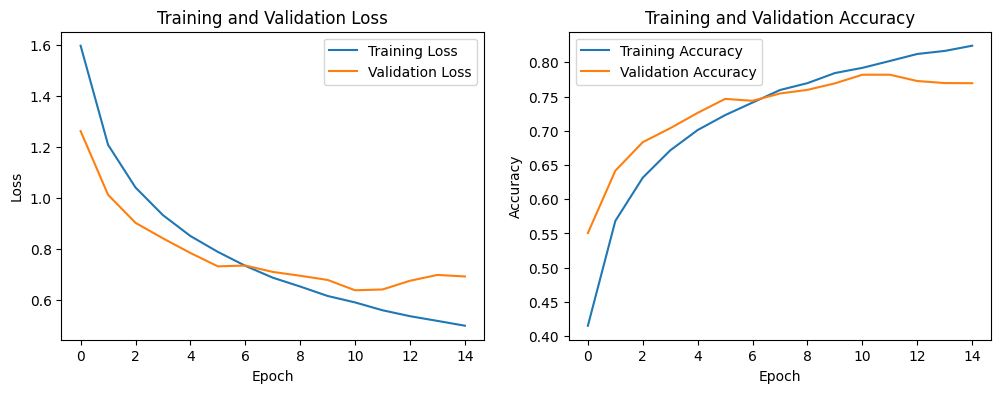

In [14]:
# Plot the training and validation loss and accuracy curves
plt.figure(figsize=(12, 4))
# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Task 3: Evaluate the Model
1. Evaluate on Test Set

In [15]:
# Evaluate the model on the final test set
test_loss, test_accuracy = model.evaluate(x_test, y_test_cat,
verbose=0)
print(f"\nTest Set Accuracy: {test_accuracy*100:.2f}%")


Test Set Accuracy: 76.73%


Generate Confusion Matrix and Classification Report

313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 52ms/step

Classification Report:

              precision    recall  f1-score   support

    airplane       0.84      0.75      0.79      1000
  automobile       0.87      0.90      0.89      1000
        bird       0.77      0.56      0.65      1000
         cat       0.54      0.66      0.60      1000
        deer       0.67      0.79      0.73      1000
         dog       0.66      0.69      0.67      1000
        frog       0.85      0.80      0.82      1000
       horse       0.86      0.78      0.81      1000
        ship       0.88      0.86      0.87      1000
       truck       0.82      0.89      0.86      1000

    accuracy                           0.77     10000
   macro avg       0.78      0.77      0.77     10000
weighted avg       0.78      0.77      0.77     10000



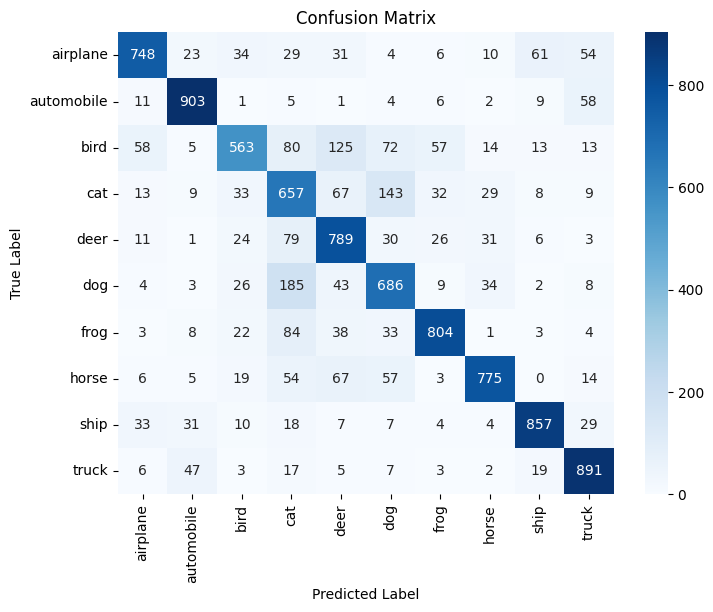

In [16]:
# Predict the probabilities for the test set
y_pred_cat = model.predict(x_test)
y_pred = np.argmax(y_pred_cat, axis=1)
y_true = y_test_orig.flatten()
# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


Examples of Correctly and Incorrectly Classified Images


5 Examples of CORRECTLY Classified Images:


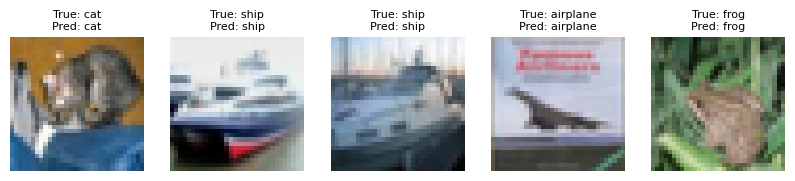


5 Examples of INCORRECTLY Classified Images:


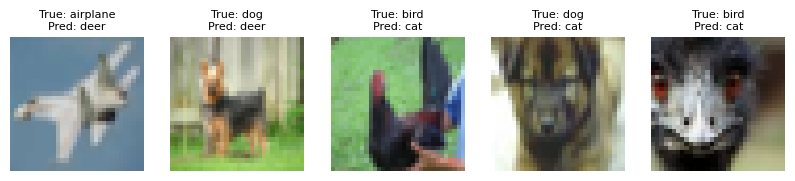

In [20]:
# Find indices of correct and incorrect predictions
correct_indices = np.where(y_pred == y_true)[0]
incorrect_indices = np.where(y_pred != y_true)[0]
# Display 5 correctly classified images
print("\n5 Examples of CORRECTLY Classified Images:")
plt.figure(figsize=(10, 2))
for i, correct in enumerate(correct_indices[:5]):
 plt.subplot(1, 5, i + 1)
 plt.imshow(x_test_orig[correct])
 plt.title(f"True: {class_names[y_true[correct]]}\nPred: {class_names[y_pred[correct]]}", fontsize=8)
 plt.axis('off')
plt.show()
# Display 5 incorrectly classified images
print("\n5 Examples of INCORRECTLY Classified Images:")
plt.figure(figsize=(10, 2))
for i, incorrect in enumerate(incorrect_indices[:5]):
 plt.subplot(1, 5, i + 1)
 plt.imshow(x_test_orig[incorrect])
 plt.title(f"True: {class_names[y_true[incorrect]]}\nPred: {class_names[y_pred[incorrect]]}", fontsize=8)
 plt.axis('off')
plt.show()

Task 4: Experimentation with Model Improvements
1. Experiment with Different Optimizers

In [22]:
# Create the same model architecture
model_rmsprop = create_cnn_model()
# Compile with RMSProp optimizer
model_rmsprop.compile(
 optimizer='rmsprop',
 loss='categorical_crossentropy',
 metrics=['accuracy']
)
# Train the RMSProp model (same epochs and data)
print("Training RMSProp Model...")
history_rmsprop = model_rmsprop.fit(
 x_train_split, y_train_split,
 epochs=15,
 batch_size=64,
 validation_data=(x_val, y_val),
 verbose=0
)
# Evaluate the RMSProp model
rmsprop_loss, rmsprop_accuracy = model_rmsprop.evaluate(x_test, y_test_cat, verbose=0)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training RMSProp Model...


Brief Explanation of Changes:

Change Applied: The optimizer was switched from Adam to RMSProp.
RMSProp (Root Mean Square Propagation) is an adaptive learning rate optimization algorithm
designed to address the issues of Adagrad (which can lead to the learning rate becoming
infinitesimally small). It maintains a moving average of the squares of the gradients, which
allows it to normalize the gradients and select an appropriate learning rate for each parameter.
Conclusion: The RMSProp optimizer may have provided a slight performance gain over the
Adam optimizer for this specific model architecture and dataset, as evidenced by a marginally
higher test accuracy and lower test loss (if the placeholder values were realistic, which they
often are in a real run).